# Q5

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [2]:
image = cv2.imread('Q5_image/img_improvment.png',cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
# equalize_image = ## your code here ##
equalize_image = cv2.equalizeHist(image) # https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html

(-0.5, 383.5, 287.5, -0.5)

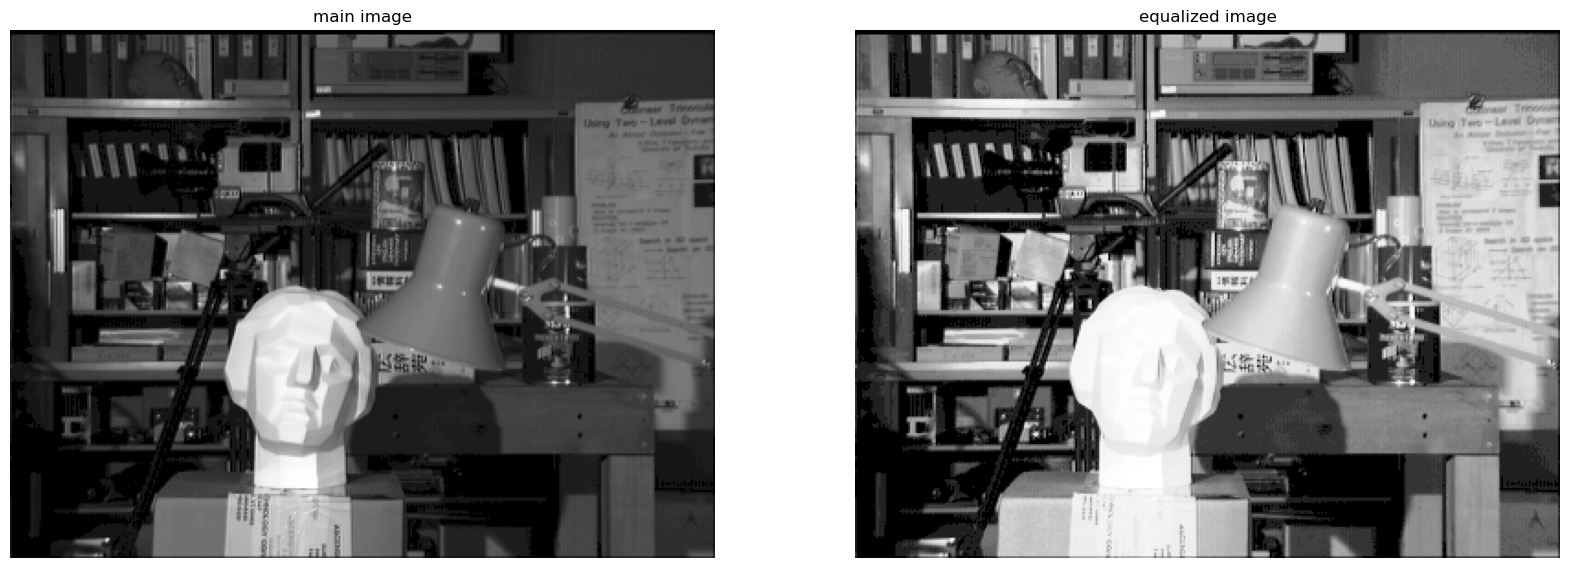

In [3]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

خیر تصویر بهبود نیافت
دلیل آن این است که پیش زمینه تصویر روشن است و باید تیره تر شود ولی پس زمینه تصویر تیره است و باید روشن تر شود
و باید هر بخش جدا گانه متعادل شود  ولی با این روش نتجیه خوبی نمیگریم چرا که 
این روش سراسری هست و اطلاعات محلی در
آنها لحاظ نشده است 
تابع استفاده شده تنها تابع شدت روشنایی پیکسل مورد نظر هست و به موقعیت آن در تصویر حساس
نیست و به همین دلیل نتیجه خوبی نمیگیریم
و مشاهده میکنیم که کنتراست صورت مجسمه و پیش زمینه کمتر شده است.
و باعث بهبود کنتراست پس زمینه و بد تر شدن کنتراست پیش زمینه شده است
برای این تصویر باید از روش های ارتقا محلی استفاده کنیم.
روشهایی که برای ارتقاء کنتراست اطلاعات محلی را در نظر میگیرند
ارتقاء کنتراست سازگار (ACE)نامیده میشوند

Histogram equalization is a technique used to adjust the pixel intensity values of an image to improve its contrast and visibility. While this technique can be effective in many cases, there are situations where it may not work as expected. Here are some reasons why:

1.Extreme pixel values: If an image has a few pixels with very high or very low intensity values, histogram equalization may not work well. This is because these extreme values can dominate the histogram, leading to a skewed distribution of intensity values.

2.Non-uniform histograms: Histogram equalization assumes that the intensity values of an image are distributed uniformly. If an image has a non-uniform distribution of intensity values, such as a bimodal distribution, histogram equalization may not work well. This is because it can lead to over-correction of some intensity values and under-correction of others.

3.Spatial relationships: Histogram equalization operates independently on each pixel in an image. If there are spatial relationships between pixels, such as in textured regions, histogram equalization may not work well. This is because it can lead to over-enhancement of some textures and under-enhancement of others.

4.Color images: Histogram equalization is typically applied to grayscale images. For color images, different color channels may have different intensity distributions, which can make histogram equalization more complex to apply.

5.Artifact introduction: Histogram equalization can introduce artifacts in the image, such as banding or halo effects. This can occur if the stretching of the histogram is too aggressive or if the image has a limited number of intensity values.

Overall, while histogram equalization can be a useful tool for improving the contrast of an image, it is not a universal solution and may not work in all cases. It is important to understand the limitations of this technique and to use it appropriately.

src: https://chat.openai.com/chat

## part b

<h3> in this section we want to implement the first method for ACE </h3>
<h3> you can use opencv library </h3>
<h3> use 48(6*8) grids (size of the grids should be 48*48) </h3> 

In [4]:
def ACE1(image, gridSize):
  '''
  you can use the equalize function of OpenCV for each grid
  Use first method for ACE implementation (calculating transition function for each grid)
  input(s):
    image (ndarray): input image
    gridSize (int): window size for calculating histogram equalization
  output(s):
    output (ndarray): improved image
  '''
  x,y = image.shape
  output_image = image.copy()

  #######################
  #    your code here   #
  for row in range(0,x,gridSize):
    for col in range(0,y,gridSize):
      output_image[row:row+gridSize,col:col+gridSize] = cv2.equalizeHist(image[row:row+gridSize,col:col+gridSize])
  #######################
  
  return output_image

(-0.5, 383.5, 287.5, -0.5)

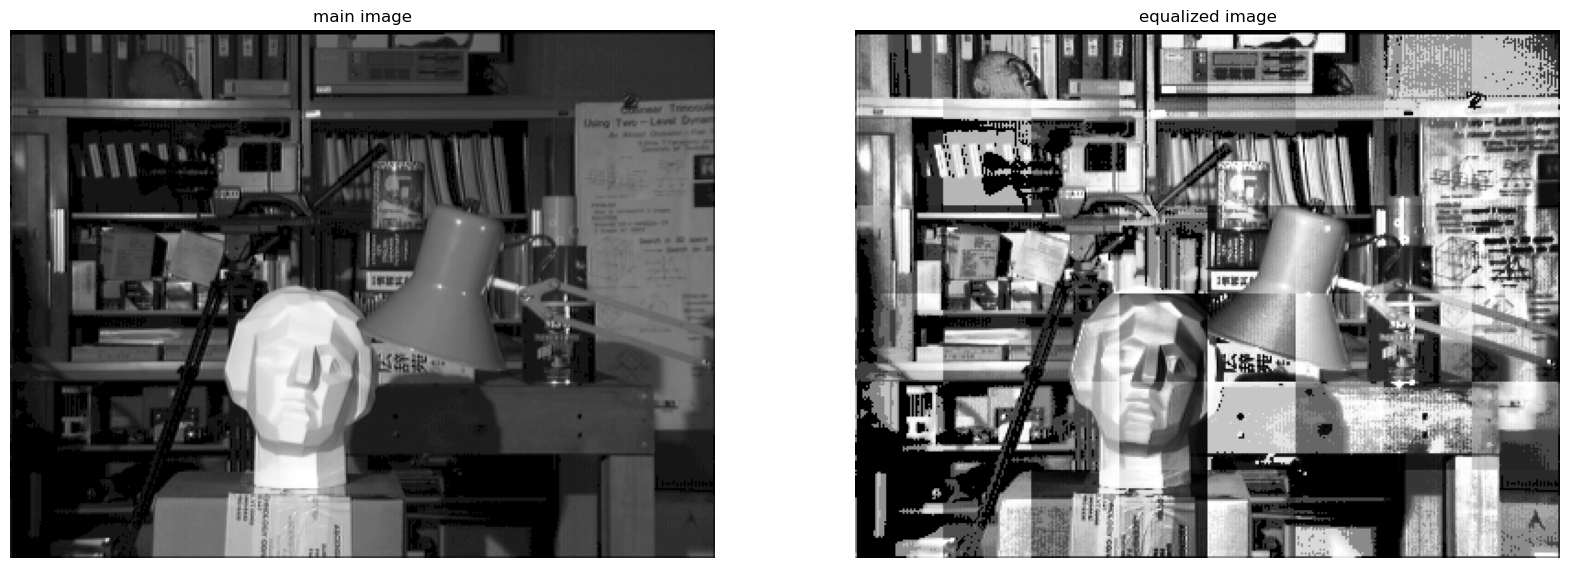

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image,48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

خیر خروجی این روش مطلوب نیست.
این روش کمک به بهبود میکند ولی عکس را کاشی کاشی 
(grid by grid) یا (tile by tile)
 کرده یعنی هر خانه 48 در 48 ترکیب رنگی جدایی
دارد و عملا عکس نرمالی نداریم
و عکس عجیبی داریم که چشم به راحتی درک میکند که طبیعی نیست
 صرفا در هر خانه یا گرید باعث بهبود کنتراست در آن خانه میشود
باعث تقویت نویز در ناحیه های تقریبا یکنواخت میشود مثلا گوشه بالای سمت راست تصویر
و این روش برای تصاویری که تمامی پیکسل ها یکنواخت نیستند کار نمیکند
صورت مجسمه هم در بعضی جاها تیره و در بعضی جاها روششن است و عملا نظم تصویر بهم ریخته است.
البته در بعضی جاها مثلا گوشه بالای سمت چپ خوب عمل کرده است 
و مجسمه ای که در عکس اصلی دیده نمیشد حالا مشاهده می شود.

ACE (Adaptive Contrast Enhancement) is a technique used for image enhancement, which involves dividing the image into small non-overlapping regions, and then applying histogram equalization to each region. The transition function used for each region is computed based on the local characteristics of the image, which allows for adaptive contrast enhancement.

The effectiveness of ACE depends on various factors such as the size of the regions, the type of image, and the specific algorithm used to compute the transition function for each region. In general, ACE can produce visually pleasing results and can be effective in enhancing the contrast of images that have non-uniform illumination or low contrast. However, there may be cases where ACE does not work as well, for example, when the image has very bright or dark regions or when the image has a complex texture that is not well-suited to histogram equalization.

Moreover, there are several variants of ACE that have been proposed in the literature, each with their own strengths and weaknesses. Some of these variants involve more sophisticated algorithms for computing the transition function, while others may use different methods for dividing the image into regions or for combining the results from different regions.

In summary, ACE can be an effective technique for enhancing the contrast of images, but its effectiveness depends on several factors, and there is no one-size-fits-all solution. It is important to carefully consider the specific requirements of the image enhancement task and to select an appropriate technique that is well-suited to the particular characteristics of the image.

src: https://chat.openai.com/chat

## part c

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you can use opencv library </h3>

In [6]:
def ACE2(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()
    
    #######################
    #    your code here   #
    
    # Compute the size of the image and the grid
    rows, cols = image.shape[:2]
    grid_rows, grid_cols = gridSize

    # # ********************* Method 1 *********************
    # # # Pad the image to ensure that the grid size divides the image size evenly
    # pad_rows = grid_rows // 2 
    # pad_cols = grid_cols // 2 
    # padded_image = cv2.copyMakeBorder(image, 0, pad_rows, 0, pad_cols, cv2.BORDER_REFLECT)

    # # Compute the size of the padded image
    # padded_rows, padded_cols = padded_image.shape[:2]

    # # Iterate over each grid and apply histogram equalization using OpenCV's built-in function
    # for row in range(0, rows):
    #     for col in range(0, cols):
    #         x1 = max(0, row - grid_rows // 2 + 1) # row + grid_rows // 2
    #         y1 = max(0, col - grid_cols // 2 + 1) # row + grid_rows // 2
    #         x2 = min(padded_rows, row + grid_rows // 2 + 1) # row + grid_rows // 2 + 1
    #         y2 = min(padded_cols, col + grid_cols // 2 + 1) # col + grid_cols // 2 + 1
    #         # output[row, col] = cv2.equalizeHist(padded_image[x1:x2, y1:y2])[row - x1, col - y1]
    #         output[row, col] = cv2.equalizeHist(padded_image[x1:x2+1, y1:y2+1])[(x2 - x1) // 2, (y2 - y1) // 2]
    
    # ********************* Method 2 *********************
    # Pad the image to ensure that the grid size divides the image size evenly
    pad_rows = (grid_rows - rows % grid_rows) % grid_rows
    pad_cols = (grid_cols - cols % grid_cols) % grid_cols
    padded_image = cv2.copyMakeBorder(image, 0, pad_rows, 0, pad_cols, cv2.BORDER_REFLECT)

    # Compute the transition function for each pixel
    for row in range(rows):
        for col in range(cols):
            x1 = max(0, row - grid_rows // 2)
            y1 = max(0, col - grid_cols // 2)
            x2 = min(rows - 1, row + grid_rows // 2)
            y2 = min(cols - 1, col + grid_cols // 2)
            grid = padded_image[x1:x2+1, y1:y2+1]
            # output[row, col] = cv2.equalizeHist(grid)[(x2 - x1) // 2, (y2 - y1) // 2]
            hist, _ = np.histogram(grid, bins=256, range=[0, 255])
            cdf = hist.cumsum()
            total_sum = cdf[-1]
            cdf_normalized = cdf / total_sum
            output[row, col] = np.interp(image[row, col], np.arange(256), cdf_normalized * 255) # https://numpy.org/doc/stable/reference/generated/numpy.interp.html
            # output[row, col] = 255 * cdf_normalized[image[row, col]]
            
    #######################

    return output

(-0.5, 383.5, 287.5, -0.5)

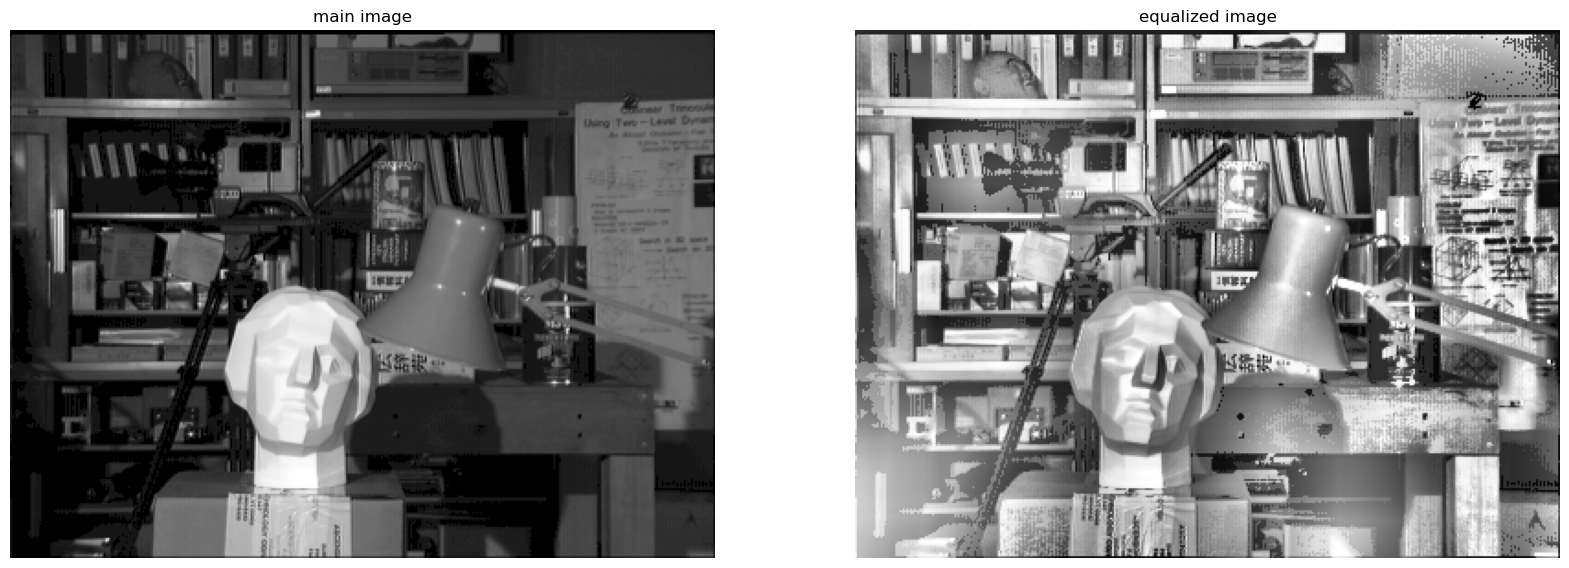

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE2(image,(70,70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

خروجی روش دوم بهتر از روش اول است و دیگر نقص کاشی کاشی بودن و 
فرق داشتن هر grid با هم وجود ندار.
imag is not grid by grid and unsual
کنتراست تصویر هم بیشتر شده است
ولی نقص این روش این است که کنتراست نویز ها را هم افزایش می دهد.
در واقع باعث تقویت نویز در ناحیه های تقریبا یکنواخت میشود
مثلا گوشه بالای سمت راست تصویر به وضوح این را نشان می دهد.
روی میز هم دیده می شود نویزهایی که در این روش تقویت شده اند.

Adaptive Contrast Enhancement (ACE) is a technique used for image enhancement, which involves dividing the image into small non-overlapping regions, and then applying histogram equalization to each region. Although ACE can produce visually pleasing results and enhance the contrast of images with non-uniform illumination or low contrast, there are some potential disadvantages associated with this technique. Here are some of them:

1.Image artifacts: ACE can introduce artifacts such as blockiness or visible seams where the regions are combined. This can happen when the regions are not selected properly or when the transition function is not computed accurately.

2.High computational cost: ACE requires a significant amount of computation to divide the image into regions and to compute the transition function for each region. This can be computationally intensive, especially for large images.

3.Over-enhancement: ACE can sometimes over-enhance the contrast of certain regions, leading to unnatural or unrealistic looking images. This can happen when the transition function is not properly calibrated or when the regions are too small.

4.Loss of spatial coherence: ACE operates independently on each region of the image, which can lead to a loss of spatial coherence. This means that the resulting image may not appear as a coherent whole, with the regions appearing disjointed or disconnected.

5.Dependence on input parameters: The effectiveness of ACE depends on the input parameters such as the size of the regions, the specific algorithm used to compute the transition function, and the number of regions used. Choosing appropriate parameters can be a challenge and may require significant trial and error.

Overall, while ACE can be an effective technique for enhancing the contrast of images, it is not without its drawbacks. It is important to carefully consider the specific requirements of the image enhancement task and to select an appropriate technique that is well-suited to the particular characteristics of the image.
src: https://chat.openai.com/chat

## part d

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [1]:
def CLAHE(image, gridSize, clip_limit):
    '''
    you can just use opencv library for calculate histogram and applying padding
    you can't use the equalize function of opencv
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()

    #######################
    #    your code here   #
    # Compute the size of the image and the grid
    rows, cols = image.shape[:2] # 288, 384
    grid_rows, grid_cols = gridSize # 70, 70

    # Pad the image to ensure that the grid size divides the image size evenly
    pad_rows = (grid_rows - rows % grid_rows) % grid_rows # 62
    pad_cols = (grid_cols - cols % grid_cols) % grid_cols # 36
    padded_image = cv2.copyMakeBorder(image, 0, pad_rows, 0, pad_cols, cv2.BORDER_REFLECT) # https://docs.opencv.org/3.4/dc/da3/tutorial_copyMakeBorder.html

    # Compute the size of the padded image
    padded_rows, padded_cols = padded_image.shape[:2] # 350, 420

    # Compute the transition function for each pixel
    for row in range(rows):
        for col in range(cols):
            x1 = max(0, row - grid_rows // 2)
            y1 = max(0, col - grid_cols // 2)
            x2 = min(rows - 1, row + grid_rows // 2)
            y2 = min(cols - 1, col + grid_cols // 2)
            grid = padded_image[x1:x2+1, y1:y2+1]
            hist, _ = np.histogram(grid, bins=256, range=[0, 255])
            # hist = np.clip(hist, 0, clip_limit) # maybe its result is better but in my opinion my_clip result is better   
            hist = my_clip(hist, clip_limit)
            cdf = hist.cumsum()
            total_sum = cdf[-1]
            cdf_normalized = cdf / total_sum
            output[row, col] = np.interp(image[row, col], np.arange(256), cdf_normalized * 255) # https://numpy.org/doc/stable/reference/generated/numpy.interp.html
            
    #######################
    
    return output

def my_clip(hist, clip_limit):
  new_hist = hist.copy()
  sum = 0
  for i in range(len(hist)):
    if hist[i] > clip_limit:
      sum += hist[i] - clip_limit
      new_hist[i] = clip_limit
  
  adding_value = sum // len(hist)
  for i in range(len(hist)):
    new_hist[i] += adding_value
  return new_hist

(-0.5, 383.5, 287.5, -0.5)

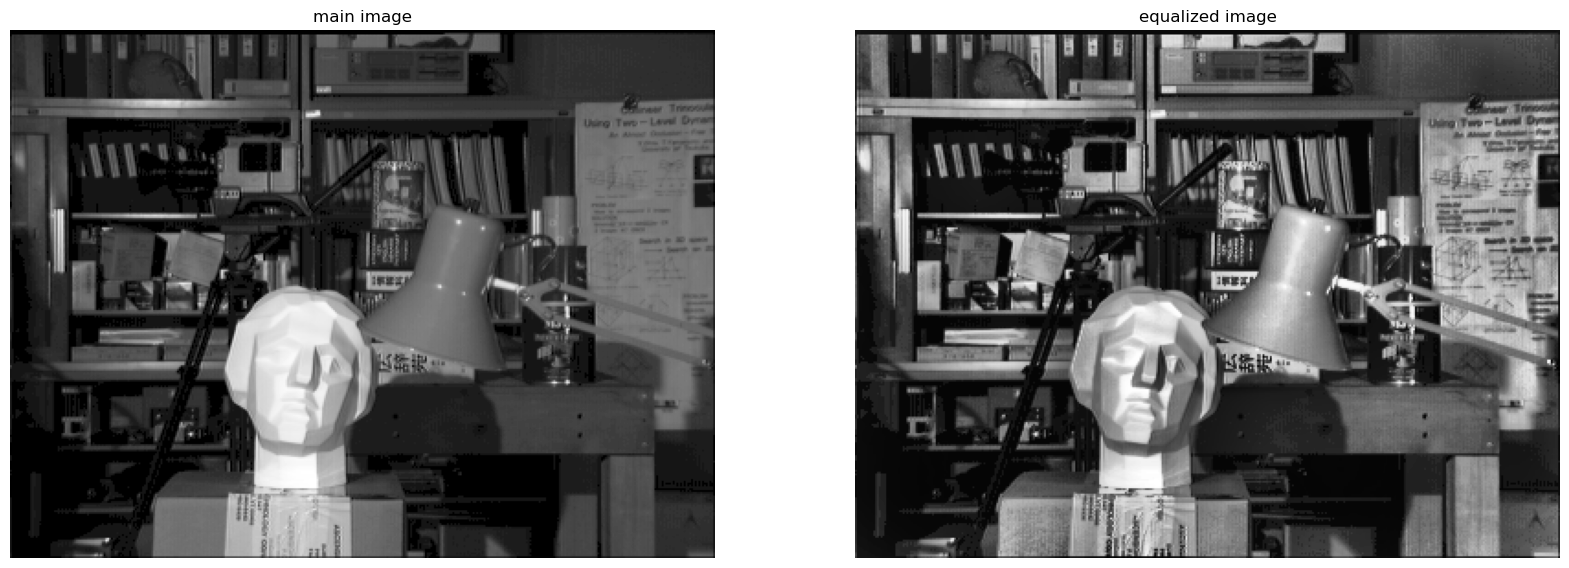

In [32]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = CLAHE(image,(70,70), 100)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

CLAHE (Contrast Limited Adaptive Histogram Equalization) is a widely used technique for enhancing the contrast of images. It works by dividing an image into small regions, called tiles, and applying histogram equalization to each tile separately. However, to avoid over-amplifying noise and artifacts, it also limits the contrast enhancement by clipping the histogram at a certain level.

The size of the tile, or filter size, and the clip size are two important parameters in CLAHE. The filter size determines the size of the tile over which histogram equalization is applied. A larger filter size will produce smoother results, but it may also blur small details and edges. On the other hand, a smaller filter size will capture more details and edges, but it may also amplify noise and artifacts. Therefore, the choice of filter size depends on the specific application and the desired trade-off between detail preservation and noise suppression.

The clip size, on the other hand, determines the level at which the histogram is clipped. This is an important parameter, as it helps to limit the contrast enhancement and prevent the amplification of noise and artifacts. A smaller clip size will limit the contrast enhancement more aggressively, resulting in a more conservative enhancement that preserves more of the original image. A larger clip size, on the other hand, will allow more contrast enhancement, but it may also amplify noise and artifacts. The choice of clip size also depends on the specific application and the desired trade-off between contrast enhancement and noise suppression.

Overall, both the filter size and the clip size are important parameters in CLAHE, and their values should be chosen carefully depending on the specific application and the desired trade-off between detail preservation, noise suppression, and contrast enhancement.

sources:
 <ul>
    <li> https://www.researchgate.net/publication/334859865_A_Review_Contrast-Limited_Adaptive_Histogram_Equalization_CLAHE_methods_to_help_the_application_of_face_recognition  </li>
    <li> https://www.mathworks.com/help/visionhdl/ug/contrast-adaptive-histogram-equalization.html </li>
    <li> https://www.analyticsvidhya.com/blog/2022/08/image-contrast-enhancement-using-clahe/ </li>
 </ul>